# Preprocessing

## Testing Input

In [18]:
import pandas as pd
import json
import glob

In [19]:
with open('Downloads/MyFitbitData/OliviaOlivia/Physical Activity/time_in_heart_rate_zones-2022-05-27.json') as data_file:    
    data = json.load(data_file)  

In [20]:
data

[{'dateTime': '05/27/22 00:00:00',
  'value': {'valuesInZones': {'IN_DEFAULT_ZONE_3': 0.0,
    'IN_DEFAULT_ZONE_2': 1.0,
    'IN_DEFAULT_ZONE_1': 203.0,
    'BELOW_DEFAULT_ZONE_1': 467.0}}}]

In [21]:
df = pd.json_normalize(data)
df

,dateTime,value.valuesInZones.IN_DEFAULT_ZONE_3,value.valuesInZones.IN_DEFAULT_ZONE_2,value.valuesInZones.IN_DEFAULT_ZONE_1,value.valuesInZones.BELOW_DEFAULT_ZONE_1
0,05/27/22 00:00:00,0.0,1.0,203.0,467.0


## Import Time in Heart Rate Zones

In [22]:
import glob

path = r'Downloads/MyFitbitData/OliviaOlivia/Physical Activity/' # use your path
all_files = glob.glob(path + "/time_in_heart_rate_zones-*.json")

li = []

for filename in all_files:
    with open(filename) as data_file:    
        data = json.load(data_file)
    df = pd.json_normalize(data)
    li.append(df)

df_time_in_heart_rate_zones = pd.DataFrame()
df_time_in_heart_rate_zones = pd.concat(li, axis=0, ignore_index=True)

In [23]:
df_time_in_heart_rate_zones = df_time_in_heart_rate_zones.rename(columns={"value.valuesInZones.IN_DEFAULT_ZONE_3": "IN_DEFAULT_ZONE_3", "value.valuesInZones.IN_DEFAULT_ZONE_2": "IN_DEFAULT_ZONE_2", "value.valuesInZones.IN_DEFAULT_ZONE_1": "IN_DEFAULT_ZONE_1", "value.valuesInZones.BELOW_DEFAULT_ZONE_1": "BELOW_DEFAULT_ZONE_1"})
df_time_in_heart_rate_zones

,dateTime,IN_DEFAULT_ZONE_3,IN_DEFAULT_ZONE_2,IN_DEFAULT_ZONE_1,BELOW_DEFAULT_ZONE_1
0,04/21/22 00:00:00,0.0,13.0,180.0,818.0
1,03/25/22 00:00:00,0.0,15.0,290.0,615.0
2,05/20/22 00:00:00,0.0,6.0,210.0,641.0
3,03/09/22 00:00:00,1.0,12.0,133.0,815.0
4,02/24/22 00:00:00,0.0,14.0,102.0,893.0
...,...,...,...,...,...
99,03/30/22 00:00:00,0.0,5.0,153.0,511.0
100,05/19/22 00:00:00,0.0,6.0,120.0,607.0
101,04/18/22 00:00:00,0.0,0.0,21.0,468.0
102,05/23/22 00:00:00,0.0,0.0,83.0,262.0


## Import Heart Rate

In [24]:
path = r'Downloads/MyFitbitData/OliviaOlivia/Physical Activity/' # use your path
all_files = glob.glob(path + "/heart_rate-*.json")

li = []

for filename in all_files:
    with open(filename) as data_file:    
        data = json.load(data_file)
    df = pd.json_normalize(data)
    li.append(df)

df_heart_rate_all = pd.DataFrame()
df_heart_rate_all = pd.concat(li, axis=0, ignore_index=True)

In [25]:
df_heart_rate_all

,dateTime,value.bpm,value.confidence
0,03/09/22 16:00:08,53,3
1,03/09/22 16:00:23,53,3
2,03/09/22 16:00:28,54,3
3,03/09/22 16:00:43,54,3
4,03/09/22 16:00:48,55,3
...,...,...,...
623385,05/16/22 14:39:14,91,2
623386,05/16/22 14:39:29,90,2
623387,05/16/22 14:39:34,89,2
623388,05/16/22 14:39:39,90,2


## Import Minutes Captures

In [26]:
path = r'Downloads/MyFitbitData/OliviaOlivia/Physical Activity/' # use your path
calories_files = glob.glob(path + "/calories-*.json")
distance_files = glob.glob(path + "/distance-*.json")
steps_files = glob.glob(path + "/steps-*.json")
very_active_files = glob.glob(path + "/very_active_minutes-*.json")
moderately_active_files = glob.glob(path + "/moderately_active_minutes-*.json")
lightly_active_files = glob.glob(path + "/lightly_active_minutes-*.json")

df_all_mins = pd.DataFrame()

In [27]:
li = []

for filename in calories_files:
    with open(filename) as data_file:    
        data = json.load(data_file)
    df = pd.json_normalize(data)
    li.append(df)

df_temp = pd.DataFrame()
df_temp = pd.concat(li, axis=0, ignore_index=True)
df_temp = df_temp.rename(columns={"value": "calories"})

In [28]:
li = []

for filename in distance_files:
    with open(filename) as data_file:    
        data = json.load(data_file)
    df = pd.json_normalize(data)
    li.append(df)

df_temp_distance = pd.DataFrame()
df_temp_distance = pd.concat(li, axis=0, ignore_index=True)
df_temp_distance = df_temp_distance.rename(columns={"value": "distance"})

In [29]:
li = []

for filename in steps_files:
    with open(filename) as data_file:    
        data = json.load(data_file)
    df = pd.json_normalize(data)
    li.append(df)

df_temp_steps = pd.DataFrame()
df_temp_steps = pd.concat(li, axis=0, ignore_index=True)
df_temp_steps = df_temp_steps.rename(columns={"value": "steps"})

In [30]:
li = []

for filename in very_active_files:
    with open(filename) as data_file:    
        data = json.load(data_file)
    df = pd.json_normalize(data)
    li.append(df)

df_temp_very_active = pd.DataFrame()
df_temp_very_active = pd.concat(li, axis=0, ignore_index=True)
df_temp_very_active = df_temp_very_active.rename(columns={"value": "very_active"})

In [31]:
li = []

for filename in moderately_active_files:
    with open(filename) as data_file:    
        data = json.load(data_file)
    df = pd.json_normalize(data)
    li.append(df)

df_temp_moderately_active = pd.DataFrame()
df_temp_moderately_active = pd.concat(li, axis=0, ignore_index=True)
df_temp_moderately_active = df_temp_moderately_active.rename(columns={"value": "moderately_active"})

In [32]:
li = []

for filename in lightly_active_files:
    with open(filename) as data_file:    
        data = json.load(data_file)
    df = pd.json_normalize(data)
    li.append(df)

df_temp_lightly_active = pd.DataFrame()
df_temp_lightly_active = pd.concat(li, axis=0, ignore_index=True)
df_temp_lightly_active = df_temp_lightly_active.rename(columns={"value": "lightly_active"})

In [33]:
df_all_mins = pd.merge(df_temp_distance,df_temp,on='dateTime',how='outer')
df_all_mins = pd.merge(df_all_mins,df_temp_steps,on='dateTime',how='outer')
df_all_mins = pd.merge(df_all_mins,df_temp_very_active,on='dateTime',how='outer')
df_all_mins = pd.merge(df_all_mins,df_temp_moderately_active,on='dateTime',how='outer')
df_all_mins = pd.merge(df_all_mins,df_temp_lightly_active,on='dateTime',how='outer')
df_all_mins

,dateTime,distance,calories,steps,very_active,moderately_active,lightly_active
0,04/12/22 16:00:00,0,0.92,0,NaN,NaN,NaN
1,04/12/22 16:06:00,0,0.83,0,NaN,NaN,NaN
2,04/12/22 16:11:00,0,0.83,0,NaN,NaN,NaN
3,04/12/22 16:22:00,0,0.83,0,NaN,NaN,NaN
4,04/12/22 16:25:00,0,0.92,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
152232,06/07/22 00:00:00,NaN,NaN,NaN,0,0,0
152233,06/08/22 00:00:00,NaN,NaN,NaN,0,0,0
152234,06/09/22 00:00:00,NaN,NaN,NaN,0,0,0
152235,06/10/22 00:00:00,NaN,NaN,NaN,0,0,0


## Import Exercise

In [34]:
path = r'Downloads/MyFitbitData/OliviaOlivia/Physical Activity/' # use your path
all_files = glob.glob(path + "/exercise-*.json")

li = []

for filename in all_files:
    with open(filename) as data_file:    
        data = json.load(data_file)
    df = pd.json_normalize(data)
    li.append(df)

df_all = pd.DataFrame()
df_all = pd.concat(li, axis=0, ignore_index=True)
df_all

,logId,activityName,activityTypeId,activityLevel,averageHeartRate,calories,distance,distanceUnit,duration,activeDuration,steps,logType,heartRateZones,speed,pace,lastModified,startTime,originalStartTime,originalDuration,elevationGain,hasGps,shouldFetchDetails,hasActiveZoneMinutes,source.type,source.name,source.id,source.url,source.trackerFeatures,manualValuesSpecified.calories,manualValuesSpecified.distance,manualValuesSpecified.steps,activeZoneMinutes.totalMinutes,activeZoneMinutes.minutesInHeartRateZones,tcxLink
0,45991958684,Interval Workout,20057,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",89.0,3,0.001391,Kilometer,93000,88000,9.0,tracker,"[{'name': 'Out of Range', 'min': 30, 'max': 11...",0.056864,63309.352518,02/14/22 00:40:34,02/14/22 00:27:57,02/14/22 00:27:57,93000,0.0,False,True,True,tracker,Charge 5,199688179,https://www.fitbit.com/,"[GPS, HEARTRATE, PACE, CALORIES, DISTANCE, STEPS]",False,False,False,0,"[{'minutes': 0, 'zoneName': 'Cardio', 'order':...",NaN
1,45991958685,Weights,2131,"[{'minutes': 25, 'name': 'sedentary'}, {'minut...",99.0,105,NaN,NaN,2846000,2845000,116.0,tracker,"[{'name': 'Out of Range', 'min': 30, 'max': 11...",NaN,NaN,02/14/22 01:23:53,02/14/22 00:29:56,02/14/22 00:29:56,2846000,0.0,False,False,True,tracker,Charge 5,199688179,https://www.fitbit.com/,"[HEARTRATE, CALORIES, STEPS]",False,False,False,9,"[{'minutes': 0, 'zoneName': 'Cardio', 'order':...",NaN
2,46007521337,Interval Workout,20057,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",110.0,33,0.012320,Kilometer,560000,560000,40.0,tracker,"[{'name': 'Out of Range', 'min': 30, 'max': 11...",0.083379,43176.561295,02/15/22 00:10:14,02/14/22 23:46:41,02/14/22 23:46:41,560000,0.0,False,True,True,tracker,Charge 5,199688179,https://www.fitbit.com/,"[GPS, HEARTRATE, PACE, CALORIES, DISTANCE, STEPS]",False,False,False,5,"[{'minutes': 0, 'zoneName': 'Cardio', 'order':...",NaN
3,46030288021,Interval Workout,20057,"[{'minutes': 2, 'name': 'sedentary'}, {'minute...",102.0,20,0.001305,Kilometer,560000,560000,8.0,tracker,"[{'name': 'Out of Range', 'min': 30, 'max': 11...",0.008421,427480.916031,02/16/22 00:05:31,02/15/22 23:43:25,02/15/22 23:43:25,560000,0.0,False,True,True,tracker,Charge 5,199688179,https://www.fitbit.com/,"[GPS, HEARTRATE, PACE, CALORIES, DISTANCE, STEPS]",False,False,False,0,"[{'minutes': 0, 'zoneName': 'Cardio', 'order':...",NaN
4,46059600468,Interval Workout,20057,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",124.0,44,0.518086,Kilometer,560000,560000,782.0,tracker,"[{'name': 'Out of Range', 'min': 30, 'max': 11...",3.346714,1075.681905,02/17/22 01:16:02,02/16/22 23:43:05,02/16/22 23:43:05,560000,0.0,False,True,True,tracker,Charge 5,199688179,https://www.fitbit.com/,"[GPS, HEARTRATE, PACE, CALORIES, DISTANCE, STEPS]",False,False,False,7,"[{'minutes': 0, 'zoneName': 'Cardio', 'order':...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,48300354178,Walk,90013,"[{'minutes': 1, 'name': 'sedentary'}, {'minute...",105.0,74,NaN,NaN,1024000,1024000,1556.0,auto_detected,"[{'name': 'Out of Range', 'min': 30, 'max': 12...",NaN,NaN,05/25/22 02:48:06,05/24/22 09:59:25,05/24/22 09:59:25,1024000,NaN,False,False,True,NaN,NaN,NaN,NaN,NaN,False,False,False,0,"[{'minutes': 0, 'zoneName': 'Out of Range', 'o...",NaN
167,48329752600,Workout,3000,"[{'minutes': 2, 'name': 'sedentary'}, {'minute...",130.0,97,NaN,NaN,1213000,1212000,1316.0,tracker,"[{'name': 'Out of Range', 'min': 30, 'max': 12...",NaN,NaN,05/27/22 12:19:41,05/25/22 23:49:43,05/25/22 23:49:43,1213000,0.0,False,False,True,tracker,Charge 5,199688179,https://www.fitbit.com/,"[CALORIES, STEPS, HEARTRATE]",False,False,False,17,"[{'minutes': 0, 'zoneName': 'Out of Range', 'o...",NaN
168,48356833109,Aerobic Workout,3001,"[{'minutes': 9, 'name': 'sedentary'}, {'minute...",110.0,241,NaN,NaN,4506000,4506000,2844.0,auto_detected,"[{'name': 'Out of Range', 'min': 30, 'max': 12...",NaN,NaN,0

In [35]:
pd.set_option('display.max_columns', None)
df_all

,logId,activityName,activityTypeId,activityLevel,averageHeartRate,calories,distance,distanceUnit,duration,activeDuration,steps,logType,heartRateZones,speed,pace,lastModified,startTime,originalStartTime,originalDuration,elevationGain,hasGps,shouldFetchDetails,hasActiveZoneMinutes,source.type,source.name,source.id,source.url,source.trackerFeatures,manualValuesSpecified.calories,manualValuesSpecified.distance,manualValuesSpecified.steps,activeZoneMinutes.totalMinutes,activeZoneMinutes.minutesInHeartRateZones,tcxLink
0,45991958684,Interval Workout,20057,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",89.0,3,0.001391,Kilometer,93000,88000,9.0,tracker,"[{'name': 'Out of Range', 'min': 30, 'max': 11...",0.056864,63309.352518,02/14/22 00:40:34,02/14/22 00:27:57,02/14/22 00:27:57,93000,0.0,False,True,True,tracker,Charge 5,199688179,https://www.fitbit.com/,"[GPS, HEARTRATE, PACE, CALORIES, DISTANCE, STEPS]",False,False,False,0,"[{'minutes': 0, 'zoneName': 'Cardio', 'order':...",NaN
1,45991958685,Weights,2131,"[{'minutes': 25, 'name': 'sedentary'}, {'minut...",99.0,105,NaN,NaN,2846000,2845000,116.0,tracker,"[{'name': 'Out of Range', 'min': 30, 'max': 11...",NaN,NaN,02/14/22 01:23:53,02/14/22 00:29:56,02/14/22 00:29:56,2846000,0.0,False,False,True,tracker,Charge 5,199688179,https://www.fitbit.com/,"[HEARTRATE, CALORIES, STEPS]",False,False,False,9,"[{'minutes': 0, 'zoneName': 'Cardio', 'order':...",NaN
2,46007521337,Interval Workout,20057,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",110.0,33,0.012320,Kilometer,560000,560000,40.0,tracker,"[{'name': 'Out of Range', 'min': 30, 'max': 11...",0.083379,43176.561295,02/15/22 00:10:14,02/14/22 23:46:41,02/14/22 23:46:41,560000,0.0,False,True,True,tracker,Charge 5,199688179,https://www.fitbit.com/,"[GPS, HEARTRATE, PACE, CALORIES, DISTANCE, STEPS]",False,False,False,5,"[{'minutes': 0, 'zoneName': 'Cardio', 'order':...",NaN
3,46030288021,Interval Workout,20057,"[{'minutes': 2, 'name': 'sedentary'}, {'minute...",102.0,20,0.001305,Kilometer,560000,560000,8.0,tracker,"[{'name': 'Out of Range', 'min': 30, 'max': 11...",0.008421,427480.916031,02/16/22 00:05:31,02/15/22 23:43:25,02/15/22 23:43:25,560000,0.0,False,True,True,tracker,Charge 5,199688179,https://www.fitbit.com/,"[GPS, HEARTRATE, PACE, CALORIES, DISTANCE, STEPS]",False,False,False,0,"[{'minutes': 0, 'zoneName': 'Cardio', 'order':...",NaN
4,46059600468,Interval Workout,20057,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",124.0,44,0.518086,Kilometer,560000,560000,782.0,tracker,"[{'name': 'Out of Range', 'min': 30, 'max': 11...",3.346714,1075.681905,02/17/22 01:16:02,02/16/22 23:43:05,02/16/22 23:43:05,560000,0.0,False,True,True,tracker,Charge 5,199688179,https://www.fitbit.com/,"[GPS, HEARTRATE, PACE, CALORIES, DISTANCE, STEPS]",False,False,False,7,"[{'minutes': 0, 'zoneName': 'Cardio', 'order':...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,48300354178,Walk,90013,"[{'minutes': 1, 'name': 'sedentary'}, {'minute...",105.0,74,NaN,NaN,1024000,1024000,1556.0,auto_detected,"[{'name': 'Out of Range', 'min': 30, 'max': 12...",NaN,NaN,05/25/22 02:48:06,05/24/22 09:59:25,05/24/22 09:59:25,1024000,NaN,False,False,True,NaN,NaN,NaN,NaN,NaN,False,False,False,0,"[{'minutes': 0, 'zoneName': 'Out of Range', 'o...",NaN
167,48329752600,Workout,3000,"[{'minutes': 2, 'name': 'sedentary'}, {'minute...",130.0,97,NaN,NaN,1213000,1212000,1316.0,tracker,"[{'name': 'Out of Range', 'min': 30, 'max': 12...",NaN,NaN,05/27/22 12:19:41,05/25/22 23:49:43,05/25/22 23:49:43,1213000,0.0,False,False,True,tracker,Charge 5,199688179,https://www.fitbit.com/,"[CALORIES, STEPS, HEARTRATE]",False,False,False,17,"[{'minutes': 0, 'zoneName': 'Out of Range', 'o...",NaN
168,48356833109,Aerobic Workout,3001,"[{'minutes': 9, 'name': 'sedentary'}, {'minute...",110.0,241,NaN,NaN,4506000,4506000,2844.0,auto_detected,"[{'name': 'Out of Range', 'min': 30, 'max': 12...",NaN,NaN,0

In [36]:
df_activity_level = pd.DataFrame()
df_activity_level = pd.json_normalize(df_all['activityLevel'])
df_activity_level = df_activity_level.rename(columns={0: "sedentary", 1: "lightly", 2: "fairly", 3: "very"})
df_activity_level['minutes_sedentary'] = pd.json_normalize(df_activity_level['sedentary']).minutes
df_activity_level['minutes_lightly'] = pd.json_normalize(df_activity_level['lightly']).minutes
df_activity_level['minutes_fairly'] = pd.json_normalize(df_activity_level['fairly']).minutes
df_activity_level['minutes_very'] = pd.json_normalize(df_activity_level['very']).minutes
df_activity_level

,sedentary,lightly,fairly,very,minutes_sedentary,minutes_lightly,minutes_fairly,minutes_very
0,"{'minutes': 0, 'name': 'sedentary'}","{'minutes': 1, 'name': 'lightly'}","{'minutes': 0, 'name': 'fairly'}","{'minutes': 0, 'name': 'very'}",0,1,0,0
1,"{'minutes': 25, 'name': 'sedentary'}","{'minutes': 13, 'name': 'lightly'}","{'minutes': 6, 'name': 'fairly'}","{'minutes': 3, 'name': 'very'}",25,13,6,3
2,"{'minutes': 0, 'name': 'sedentary'}","{'minutes': 4, 'name': 'lightly'}","{'minutes': 4, 'name': 'fairly'}","{'minutes': 1, 'name': 'very'}",0,4,4,1
3,"{'minutes': 2, 'name': 'sedentary'}","{'minutes': 7, 'name': 'lightly'}","{'minutes': 0, 'name': 'fairly'}","{'minutes': 0, 'name': 'very'}",2,7,0,0
4,"{'minutes': 0, 'name': 'sedentary'}","{'minutes': 0, 'name': 'lightly'}","{'minutes': 2, 'name': 'fairly'}","{'minutes': 7, 'name': 'very'}",0,0,2,7
...,...,...,...,...,...,...,...,...
166,"{'minutes': 1, 'name': 'sedentary'}","{'minutes': 1, 'name': 'lightly'}","{'minutes': 12, 'name': 'fairly'}","{'minutes': 3, 'name': 'very'}",1,1,12,3
167,"{'minutes': 2, 'name': 'sedentary'}","{'minutes': 1, 'name': 'lightly'}","{'minutes': 2, 'name': 'fairly'}","{'minutes': 15, 'name': 'very'}",2,1,2,15
168,"{'minutes': 9, 'name': 'sedentary'}","{'minutes': 55, 'name': 'lightly'}","{'minutes': 9, 'name': 'fairly'}","{'minutes': 2, 'name': 'very'}",9,55,9,2
169,"{'minutes': 1, 'name': 'sedentary'}","{'minutes': 1, 'name': 'lightly'}","{'minutes': 7, 'name': 'fairly'}","{'minutes': 6, 'name': 'very'}",1,1,7,6


In [37]:
df_heart_rate = pd.DataFrame()
df_heart_rate = pd.json_normalize(df_all['heartRateZones'])
df_heart_rate = df_heart_rate.rename(columns={0: "out_of_range", 1: "fat_burn", 2: "cardio", 3: "peak"})

df_heart_rate['out_of_range_minutes'] = pd.json_normalize(df_heart_rate['out_of_range']).minutes
df_heart_rate['out_of_range_calories'] = pd.json_normalize(df_heart_rate['out_of_range']).caloriesOut
df_heart_rate['out_of_range_min'] = pd.json_normalize(df_heart_rate['out_of_range'])['min']
df_heart_rate['out_of_range_max'] = pd.json_normalize(df_heart_rate['out_of_range'])['max']

df_heart_rate['fat_burn_minutes'] = pd.json_normalize(df_heart_rate['fat_burn']).minutes
df_heart_rate['fat_burn_calories'] = pd.json_normalize(df_heart_rate['fat_burn']).caloriesOut
df_heart_rate['fat_burn_min'] = pd.json_normalize(df_heart_rate['fat_burn'])['min']
df_heart_rate['fat_burn_max'] = pd.json_normalize(df_heart_rate['fat_burn'])['max']

df_heart_rate['cardio_minutes'] = pd.json_normalize(df_heart_rate['cardio']).minutes
df_heart_rate['cardio_calories'] = pd.json_normalize(df_heart_rate['cardio']).caloriesOut
df_heart_rate['cardio_min'] = pd.json_normalize(df_heart_rate['cardio'])['min']
df_heart_rate['cardio_max'] = pd.json_normalize(df_heart_rate['cardio'])['max']

df_heart_rate['peak_minutes'] = pd.json_normalize(df_heart_rate['peak']).minutes
df_heart_rate['peak_calories'] = pd.json_normalize(df_heart_rate['peak']).caloriesOut
df_heart_rate['peak_min'] = pd.json_normalize(df_heart_rate['peak'])['min']
df_heart_rate['peak_max'] = pd.json_normalize(df_heart_rate['peak'])['max']

df_heart_rate

,out_of_range,fat_burn,cardio,peak,out_of_range_minutes,out_of_range_calories,out_of_range_min,out_of_range_max,fat_burn_minutes,fat_burn_calories,fat_burn_min,fat_burn_max,cardio_minutes,cardio_calories,cardio_min,cardio_max,peak_minutes,peak_calories,peak_min,peak_max
0,"{'name': 'Out of Range', 'min': 30, 'max': 114...","{'name': 'Fat Burn', 'min': 114, 'max': 140, '...","{'name': 'Cardio', 'min': 140, 'max': 172, 'mi...","{'name': 'Peak', 'min': 172, 'max': 220, 'minu...",1.0,3.2487,30.0,114.0,0.0,0.0000,114.0,140.0,0.0,0.0000,140.0,172.0,0.0,0.0,172.0,220.0
1,"{'name': 'Out of Range', 'min': 30, 'max': 114...","{'name': 'Fat Burn', 'min': 114, 'max': 140, '...","{'name': 'Cardio', 'min': 140, 'max': 172, 'mi...","{'name': 'Peak', 'min': 172, 'max': 220, 'minu...",38.0,65.3905,30.0,114.0,9.0,39.3176,114.0,140.0,0.0,0.0000,140.0,172.0,0.0,0.0,172.0,220.0
2,"{'name': 'Out of Range', 'min': 30, 'max': 115...","{'name': 'Fat Burn', 'min': 115, 'max': 141, '...","{'name': 'Cardio', 'min': 141, 'max': 172, 'mi...","{'name': 'Peak', 'min': 172, 'max': 220, 'minu...",4.0,15.8270,30.0,115.0,5.0,16.9099,115.0,141.0,0.0,0.0000,141.0,172.0,0.0,0.0,172.0,220.0
3,"{'name': 'Out of Range', 'min': 30, 'max': 114...","{'name': 'Fat Burn', 'min': 114, 'max': 140, '...","{'name': 'Cardio', 'min': 140, 'max': 172, 'mi...","{'name': 'Peak', 'min': 172, 'max': 220, 'minu...",9.0,22.1578,30.0,114.0,0.0,0.0000,114.0,140.0,0.0,0.0000,140.0,172.0,0.0,0.0,172.0,220.0
4,"{'name': 'Out of Range', 'min': 30, 'max': 114...","{'name': 'Fat Burn', 'min': 114, 'max': 140, '...","{'name': 'Cardio', 'min': 140, 'max': 172, 'mi...","{'name': 'Peak', 'min': 172, 'max': 220, 'minu...",2.0,8.8298,30.0,114.0,7.0,41.6500,114.0,140.0,0.0,0.0000,140.0,172.0,0.0,0.0,172.0,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,"{'name': 'Out of Range', 'min': 30, 'max': 120...","{'name': 'Fat Burn', 'min': 120, 'max': 144, '...","{'name': 'Cardio', 'min': 144, 'max': 174, 'mi...","{'name': 'Peak', 'min': 174, 'max': 220, 'minu...",17.0,73.7205,30.0,120.0,0.0,0.0000,120.0,144.0,0.0,0.0000,144.0,174.0,0.0,0.0,174.0,220.0
167,"{'name': 'Out of Range', 'min': 30, 'max': 121...","{'name': 'Fat Burn', 'min': 121, 'max': 144, '...","{'name': 'Cardio', 'min': 144, 'max': 174, 'mi...","{'name': 'Peak', 'min': 174, 'max': 220, 'minu...",4.0,11.9119,30.0,121.0,15.0,83.9664,121.0,144.0,1.0,0.9163,144.0,174.0,0.0,0.0,174.0,220.0
168,"{'name': 'Out of Range', 'min': 30, 'max': 121...","{'name': 'Fat Burn', 'min': 121, 'max': 144, '...","{'name': 'Cardio', 'min': 144, 'max': 174, 'mi...","{'name': 'Peak', 'min': 174, 'max': 220, 'minu...",61.0,186.8419,30.0,121.0,14.0,53.8118,121.0,144.0,0.0,0.0000,144.0,174.0,0.0,0.0,174.0,220.0
169,"{'name': 'Out of Range', 'min': 30, 'max': 121...","{'name': 'Fat Burn', 'min': 121, 'max': 144, '...","{'name': 'Cardio', 'min': 144, 'max': 174, 'mi...","{'name': 'Peak', 'min': 174, 'max': 220, 'minu...",14.0,62.2251,30.0,121.0,1.0,4.3316,121.0,144.0,0.0,0.0000,144.0,174.0,0.0,0.0,174.0,220.0


In [38]:
df_all = pd.merge(df_all, df_activity_level, left_index=True, right_index=True)
df_all = pd.merge(df_all, df_heart_rate, left_index=True, right_index=True)
df_all

,logId,activityName,activityTypeId,activityLevel,averageHeartRate,calories,distance,distanceUnit,duration,activeDuration,steps,logType,heartRateZones,speed,pace,lastModified,startTime,originalStartTime,originalDuration,elevationGain,hasGps,shouldFetchDetails,hasActiveZoneMinutes,source.type,source.name,source.id,source.url,source.trackerFeatures,manualValuesSpecified.calories,manualValuesSpecified.distance,manualValuesSpecified.steps,activeZoneMinutes.totalMinutes,activeZoneMinutes.minutesInHeartRateZones,tcxLink,sedentary,lightly,fairly,very,minutes_sedentary,minutes_lightly,minutes_fairly,minutes_very,out_of_range,fat_burn,cardio,peak,out_of_range_minutes,out_of_range_calories,out_of_range_min,out_of_range_max,fat_burn_minutes,fat_burn_calories,fat_burn_min,fat_burn_max,cardio_minutes,cardio_calories,cardio_min,cardio_max,peak_minutes,peak_calories,peak_min,peak_max
0,45991958684,Interval Workout,20057,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",89.0,3,0.001391,Kilometer,93000,88000,9.0,tracker,"[{'name': 'Out of Range', 'min': 30, 'max': 11...",0.056864,63309.352518,02/14/22 00:40:34,02/14/22 00:27:57,02/14/22 00:27:57,93000,0.0,False,True,True,tracker,Charge 5,199688179,https://www.fitbit.com/,"[GPS, HEARTRATE, PACE, CALORIES, DISTANCE, STEPS]",False,False,False,0,"[{'minutes': 0, 'zoneName': 'Cardio', 'order':...",NaN,"{'minutes': 0, 'name': 'sedentary'}","{'minutes': 1, 'name': 'lightly'}","{'minutes': 0, 'name': 'fairly'}","{'minutes': 0, 'name': 'very'}",0,1,0,0,"{'name': 'Out of Range', 'min': 30, 'max': 114...","{'name': 'Fat Burn', 'min': 114, 'max': 140, '...","{'name': 'Cardio', 'min': 140, 'max': 172, 'mi...","{'name': 'Peak', 'min': 172, 'max': 220, 'minu...",1.0,3.2487,30.0,114.0,0.0,0.0000,114.0,140.0,0.0,0.0000,140.0,172.0,0.0,0.0,172.0,220.0
1,45991958685,Weights,2131,"[{'minutes': 25, 'name': 'sedentary'}, {'minut...",99.0,105,NaN,NaN,2846000,2845000,116.0,tracker,"[{'name': 'Out of Range', 'min': 30, 'max': 11...",NaN,NaN,02/14/22 01:23:53,02/14/22 00:29:56,02/14/22 00:29:56,2846000,0.0,False,False,True,tracker,Charge 5,199688179,https://www.fitbit.com/,"[HEARTRATE, CALORIES, STEPS]",False,False,False,9,"[{'minutes': 0, 'zoneName': 'Cardio', 'order':...",NaN,"{'minutes': 25, 'name': 'sedentary'}","{'minutes': 13, 'name': 'lightly'}","{'minutes': 6, 'name': 'fairly'}","{'minutes': 3, 'name': 'very'}",25,13,6,3,"{'name': 'Out of Range', 'min': 30, 'max': 114...","{'name': 'Fat Burn', 'min': 114, 'max': 140, '...","{'name': 'Cardio', 'min': 140, 'max': 172, 'mi...","{'name': 'Peak', 'min': 172, 'max': 220, 'minu...",38.0,65.3905,30.0,114.0,9.0,39.3176,114.0,140.0,0.0,0.0000,140.0,172.0,0.0,0.0,172.0,220.0
2,46007521337,Interval Workout,20057,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",110.0,33,0.012320,Kilometer,560000,560000,40.0,tracker,"[{'name': 'Out of Range', 'min': 30, 'max': 11...",0.083379,43176.561295,02/15/22 00:10:14,02/14/22 23:46:41,02/14/22 23:46:41,560000,0.0,False,True,True,tracker,Charge 5,199688179,https://www.fitbit.com/,"[GPS, HEARTRATE, PACE, CALORIES, DISTANCE, STEPS]",False,False,False,5,"[{'minutes': 0, 'zoneName': 'Cardio', 'order':...",NaN,"{'minutes': 0, 'name': 'sedentary'}","{'minutes': 4, 'name': 'lightly'}","{'minutes': 4, 'name': 'fairly'}","{'minutes': 1, 'name': 'very'}",0,4,4,1,"{'name': 'Out of Range', 'min': 30, 'max': 115...","{'name': 'Fat Burn', 'min': 115, 'max': 141, '...","{'name': 'Cardio', 'min': 141, 'max': 172, 'mi...","{'name': 'Peak', 'min': 172, 'max': 220, 'minu...",4.0,15.8270,30.0,115.0,5.0,16.9099,115.0,141.0,0.0,0.0000,141.0,172.0,0.0,0.0,172.0,220.0
3,46030288021,Interval Workout,20057,"[{'minutes': 2, 'name': 'sedentary'}, {'minute...",102.0,20,0.001305,Kilometer,560000,560000,8.0,tracker,"[{'name': 'Out of Range', 'min': 30, 'max': 11...",0.008421,427480.916031,02/16/22 00:05:31,02/15/22 23:43:25,02/15/22 23:43:25,560000,0.0,False,True,True,tracker,Charge 5,199688179,https://www.fitbit.com/,"[GPS, HEARTRATE, PACE, CALORIES, DISTANCE, S

## Import Sleep

In [39]:
path = r'Downloads/MyFitbitData/OliviaOlivia/Sleep/' # use your path
all_files = glob.glob(path + "/sleep-*.json")

li = []

for filename in all_files:
    with open(filename) as data_file:    
        data = json.load(data_file)
    df = pd.json_normalize(data)
    li.append(df)

df_sleep = pd.DataFrame()
df_sleep = pd.concat(li, axis=0, ignore_index=True)

In [40]:
df_sleep

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,logType,mainSleep,levels.summary.deep.count,levels.summary.deep.minutes,levels.summary.deep.thirtyDayAvgMinutes,levels.summary.wake.count,levels.summary.wake.minutes,levels.summary.wake.thirtyDayAvgMinutes,levels.summary.light.count,levels.summary.light.minutes,levels.summary.light.thirtyDayAvgMinutes,levels.summary.rem.count,levels.summary.rem.minutes,levels.summary.rem.thirtyDayAvgMinutes,levels.data,levels.shortData
0,36087514296,2022-03-14,2022-03-13T23:42:30.000,2022-03-14T06:45:30.000,25380000,0,382,41,0,423,96,stages,0,auto_detected,True,5,48,54,32,41,66,30,278,274,10,56,53,"[{'dateTime': '2022-03-13T23:42:30.000', 'leve...","[{'dateTime': '2022-03-14T00:24:00.000', 'leve..."
1,36036404233,2022-03-10,2022-03-09T23:26:00.000,2022-03-10T07:14:30.000,28080000,0,405,63,0,468,94,stages,0,auto_detected,True,4,56,54,27,63,66,27,243,276,7,106,51,"[{'dateTime': '2022-03-09T23:26:00.000', 'leve...","[{'dateTime': '2022-03-10T00:20:30.000', 'leve..."
2,36020390659,2022-03-09,2022-03-09T00:05:30.000,2022-03-09T07:22:30.000,26220000,0,327,110,0,437,94,stages,0,auto_detected,True,2,57,54,26,110,64,27,220,279,6,50,51,"[{'dateTime': '2022-03-09T00:05:30.000', 'leve...","[{'dateTime': '2022-03-09T00:44:00.000', 'leve..."
3,36020390658,2022-03-08,2022-03-07T23:44:00.000,2022-03-08T07:27:00.000,27780000,0,380,83,0,463,92,stages,0,auto_detected,True,4,49,54,27,83,63,27,280,279,4,51,51,"[{'dateTime': '2022-03-07T23:44:00.000', 'leve...","[{'dateTime': '2022-03-08T00:23:30.000', 'leve..."
4,35992416456,2022-03-07,2022-03-06T22:55:30.000,2022-03-07T06:42:00.000,27960000,0,397,69,0,466,97,stages,0,auto_detected,True,5,67,53,44,69,63,46,314,277,3,16,53,"[{'dateTime': '2022-03-06T22:55:30.000', 'leve...","[{'dateTime': '2022-03-06T23:12:30.000', 'leve..."
5,35952186635,2022-03-04,2022-03-03T23:32:00.000,2022-03-04T07:20:30.000,28080000,0,390,78,1,468,97,stages,0,auto_detected,True,2,46,53,44,78,62,43,318,274,3,26,54,"[{'dateTime': '2022-03-03T23:32:00.000', 'leve...","[{'dateTime': '2022-03-03T23:56:00.000', 'leve..."
6,35940067147,2022-03-03,2022-03-02T23:58:00.000,2022-03-03T04:26:30.000,16080000,0,226,42,0,268,98,stages,0,auto_detected,True,3,21,56,25,42,63,26,179,280,3,26,56,"[{'dateTime': '2022-03-02T23:58:00.000', 'leve...","[{'dateTime': '2022-03-03T00:19:30.000', 'leve..."
7,35927116069,2022-03-02,2022-03-01T23:36:00.000,2022-03-02T03:41:00.000,14700000,0,208,37,0,245,96,stages,0,auto_detected,True,1,26,57,20,37,65,20,163,288,1,19,58,"[{'dateTime': '2022-03-01T23:36:00.000', 'leve...","[{'dateTime': '2022-03-02T00:44:00.000', 'leve..."
8,35914801241,2022-03-01,2022-02-28T23:44:00.000,2022-03-01T07:20:00.000,27360000,0,388,68,0,456,99,stages,0,auto_detected,True,5,56,58,40,68,64,38,283,288,7,49,59,"[{'dateTime': '2022-02-28T23:44:00.000', 'leve...","[{'dateTime': '2022-02-28T23:58:00.000', 'leve..."
9,35914801240,2022-02-28,2022-02-27T23:33:00.000,2022-02-28T07:43:00.000,29400000,0,432,58,5,490,97,stages,0,auto_detected,True,3,38,59,34,58,65,38,337,285,7,57,59,"[{'dateTime': '2022-02-27T23:33:00.000', 'leve...","[{'dateTime': '2022-02-28T00:16:30.000', 'leve..."


In [41]:
df_sleep_score = pd.read_csv(r'Downloads/MyFitbitData/OliviaOlivia/Sleep/sleep_score.csv', index_col=None, header=0)
df_sleep_score

,sleep_log_entry_id,timestamp,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,36925395588,2022-05-15T05:42:30Z,68,16,22,30,59,72,0.088280
1,36863189010,2022-05-13T06:51:00Z,77,18,23,36,56,70,0.072619
2,36863189009,2022-05-12T06:39:00Z,75,16,22,37,63,70,0.087131
3,36839982617,2022-05-11T06:59:30Z,73,17,20,36,64,70,0.131026
4,36825316576,2022-05-10T05:55:00Z,82,17,24,41,63,72,0.049312
5,36825316575,2022-05-09T06:02:30Z,80,16,22,42,50,72,0.083754
6,36825316574,2022-05-08T05:48:00Z,70,17,23,30,49,72,0.062718
7,36825316573,2022-05-07T05:39:30Z,76,16,21,39,68,72,0.102925
8,36825316572,2022-05-06T05:12:30Z,71,15,21,35,46,71,0.096128
9,36825316571,2022-05-05T06:06:00Z,72,17,21,34,67,70,0.096372


# Data Exploration

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Heartbeat by Time of Day

In [43]:
from datetime import timedelta

In [44]:
df_heart_rate_all['dt'] = pd.to_datetime(df_heart_rate_all['dateTime']).dt.date

In [45]:
df_heart_rate_daily = pd.DataFrame()
df_heart_rate_daily = pd.DataFrame(df_heart_rate_all.groupby(['dt'], as_index=False)["value.bpm"].count()).sort_values(by=['dt'])
df_heart_rate_daily['min_bpm'] = pd.DataFrame(df_heart_rate_all.groupby(['dt'], as_index=False)["value.bpm"].min()).sort_values(by=['dt'])['value.bpm']
df_heart_rate_daily['max_bpm'] = pd.DataFrame(df_heart_rate_all.groupby(['dt'], as_index=False)["value.bpm"].max()).sort_values(by=['dt'])['value.bpm']
df_heart_rate_daily['avg_bpm'] = pd.DataFrame(df_heart_rate_all.groupby(['dt'], as_index=False)["value.bpm"].mean()).sort_values(by=['dt'])['value.bpm']
df_heart_rate_daily['median_bpm'] = pd.DataFrame(df_heart_rate_all.groupby(['dt'], as_index=False)["value.bpm"].median()).sort_values(by=['dt'])['value.bpm']

df_heart_rate_daily

,dt,value.bpm,min_bpm,max_bpm,avg_bpm,median_bpm
0,2022-02-13,4247,50,102,62.363080,61.0
1,2022-02-14,2419,61,144,95.777181,93.0
2,2022-02-15,9087,50,145,76.704193,75.0
3,2022-02-16,7728,49,163,75.734990,75.0
4,2022-02-17,8534,52,166,75.425943,74.0
...,...,...,...,...,...,...
99,2022-05-23,4164,66,146,95.415226,91.0
100,2022-05-24,5244,63,135,85.005149,83.0
101,2022-05-25,4363,70,143,92.277332,88.0
102,2022-05-26,6583,54,147,93.646210,90.0


In [46]:
df_heart_rate_all['local_time'] = pd.DatetimeIndex(df_heart_rate_all['dateTime']) + timedelta(hours=8)
df_heart_rate_all['hour'] = pd.to_datetime(df_heart_rate_all['local_time']).dt.hour
df_heart_rate_all['day_name'] = pd.to_datetime(df_heart_rate_all['local_time']).dt.day_name()

Text(0.5, 1.0, 'Heatmap of Heartbeat')

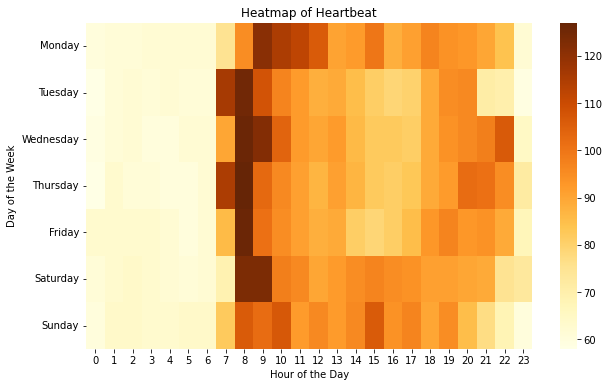

In [47]:
# day of week / hour trends
df_heatmap = df_heart_rate_all.groupby(['hour','day_name'])["value.bpm"].median()
df_heatmap = df_heatmap.unstack(level=0)
df_heatmap

# heatmap by day of week and hour

f, ax = plt.subplots(figsize=(10, 6))
sns.color_palette("YlOrBr", as_cmap=True)

reorderlist = [ 'Monday', 'Tuesday','Wednesday' ,'Thursday' ,'Friday', 'Saturday', 'Sunday']
sns.heatmap(df_heatmap.reindex(reorderlist), cmap="YlOrBr")

plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

plt.title('Heatmap of Heartbeat')

In [48]:
df_heart_rate_hourly = pd.DataFrame(df_heart_rate_all.groupby(['hour'], as_index=False)["value.bpm"].count()).sort_values(by=['hour'])
df_heart_rate_hourly['min_bpm'] = pd.DataFrame(df_heart_rate_all.groupby(['hour'], as_index=False)["value.bpm"].min()).sort_values(by=['hour'])['value.bpm']
df_heart_rate_hourly['max_bpm'] = pd.DataFrame(df_heart_rate_all.groupby(['hour'], as_index=False)["value.bpm"].max()).sort_values(by=['hour'])['value.bpm']
df_heart_rate_hourly['avg_bpm'] = pd.DataFrame(df_heart_rate_all.groupby(['hour'], as_index=False)["value.bpm"].mean()).sort_values(by=['hour'])['value.bpm']
df_heart_rate_hourly['median_bpm'] = pd.DataFrame(df_heart_rate_all.groupby(['hour'], as_index=False)["value.bpm"].median()).sort_values(by=['hour'])['value.bpm']

df_heart_rate_hourly

,hour,value.bpm,min_bpm,max_bpm,avg_bpm,median_bpm
0,0,22790,44,114,60.917639,60.0
1,1,23755,49,101,62.722543,62.0
2,2,24228,49,123,63.058445,62.0
3,3,24031,49,95,62.439557,62.0
4,4,24446,50,106,62.380880,62.0
5,5,24550,49,103,62.356660,62.0
6,6,23430,48,131,63.504994,62.0
7,7,19145,48,165,95.696370,93.0
8,8,47165,61,179,115.731687,116.0
9,9,45353,67,171,112.897074,110.0


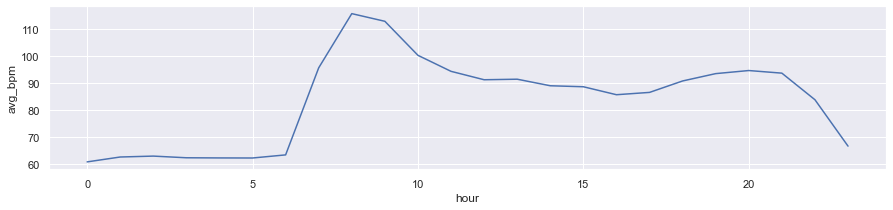

In [49]:
sns.set_theme(style="darkgrid")

f, ax = plt.subplots(figsize=(15, 3))

ax = sns.lineplot(x="hour", y="avg_bpm", 
             data=df_heart_rate_hourly.sort_values(by=['hour']))

# plt.xticks(rotation=90)
# plt.title("Total Active Room by Time of Day (PST - 1-2 May 2021)", fontsize=16)
# plt.xlabel("Capture Time (PST)")
# plt.ylabel("Total Active Room")
plt.show()

## Exercises

In [50]:
df_all['cal_per_min'] = df_all["calories"]/(df_all["duration"]/60000)

In [51]:
df_ex = pd.DataFrame(df_all.groupby(['activityName'], as_index=False)["cal_per_min"].median())
df_ex['cnt_record'] = pd.DataFrame(df_all.groupby(['activityName'], as_index=False)["cal_per_min"].count()).cal_per_min
df_ex

,activityName,cal_per_min,cnt_record
0,Aerobic Workout,3.278946,6
1,Interval Workout,3.535714,5
2,Outdoor Bike,2.380952,1
3,Run,5.997352,7
4,Sport,3.886424,3
5,Walk,3.905614,77
6,Weights,2.213633,1
7,Workout,4.644782,57
8,Yoga,1.479998,14


In [52]:
df_all['cal_per_min_peak'] = df_all["peak_calories"]/(np.where(df_all["peak_minutes"]==0, 1, df_all["peak_minutes"]))
df_all['cal_per_min_cardio'] = df_all["cardio_calories"]/(np.where(df_all["cardio_minutes"]==0, 1, df_all["cardio_minutes"]))
df_all['cal_per_min_fat_burn'] = df_all["fat_burn_calories"]/(np.where(df_all["fat_burn_minutes"]==0, 1, df_all["fat_burn_minutes"]))
df_all['cal_per_min_out_of_range'] = df_all["out_of_range_calories"]/(np.where(df_all["out_of_range_minutes"]==0, 1, df_all["out_of_range_minutes"]))

In [53]:
df_ex['cal_per_min_peak'] = pd.DataFrame(df_all.groupby(['activityName'], as_index=False)["cal_per_min_peak"].median()).cal_per_min_peak
df_ex['cal_per_min_cardio'] = pd.DataFrame(df_all.groupby(['activityName'], as_index=False)["cal_per_min_cardio"].median()).cal_per_min_cardio
df_ex['cal_per_min_fat_burn'] = pd.DataFrame(df_all.groupby(['activityName'], as_index=False)["cal_per_min_fat_burn"].median()).cal_per_min_fat_burn
df_ex['cal_per_min_out_of_range'] = pd.DataFrame(df_all.groupby(['activityName'], as_index=False)["cal_per_min_out_of_range"].median()).cal_per_min_out_of_range

df_ex

,activityName,cal_per_min,cnt_record,cal_per_min_peak,cal_per_min_cardio,cal_per_min_fat_burn,cal_per_min_out_of_range
0,Aerobic Workout,3.278946,6,0.0,0.000000,3.605502,3.222357
1,Interval Workout,3.535714,5,0.0,0.000000,3.381980,3.956750
2,Outdoor Bike,2.380952,1,0.0,0.000000,0.000000,2.412615
3,Run,5.997352,7,0.0,7.334463,5.555069,4.670895
4,Sport,3.886424,3,0.0,0.000000,3.821388,4.206650
5,Walk,3.905614,77,0.0,0.000000,0.000000,4.006730
6,Weights,2.213633,1,0.0,0.000000,4.368622,1.720803
7,Workout,4.644782,57,0.0,5.438300,4.775867,3.512483
8,Yoga,1.479998,14,0.0,0.000000,1.082900,1.441553


Text(0.5, 1.0, 'Calories by Activity Type')

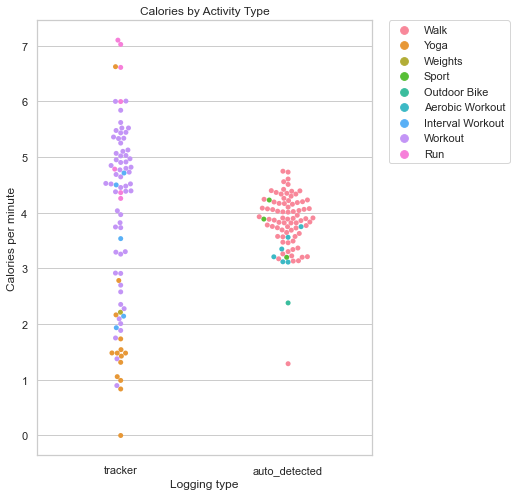

In [54]:
sns.set_theme(style="whitegrid", palette="hls")

activity_ranking = ["Walk", "Yoga", "Weights", "Sport", "Outdoor Bike", "Aerobic Workout", "Interval Workout", "Workout", "Run"]

f, ax = plt.subplots(figsize=(6, 8))
ax = sns.swarmplot(data=df_all, x="logType", y="cal_per_min", hue="activityName", hue_order=activity_ranking)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Calories per minute')
plt.xlabel('Logging type')

plt.title('Calories by Activity Type')

In [55]:
df_all['local_time'] = pd.DatetimeIndex(df_all['startTime']) + timedelta(hours=8)
df_all['dt'] = pd.to_datetime(df_all['local_time']).dt.date
df_all['day_name'] = pd.to_datetime(df_all['local_time']).dt.day_name()
df_all['hour'] = pd.to_datetime(df_all['local_time']).dt.hour

In [56]:
df = pd.DataFrame(df_all.groupby(['dt'], as_index=False)["steps"].sum())
df['calories'] = pd.DataFrame(df_all.groupby(['dt'], as_index=False)["calories"].sum()).calories
df

,dt,steps,calories
0,2022-02-14,125.0,108
1,2022-02-15,40.0,33
2,2022-02-16,8.0,20
3,2022-02-17,782.0,44
4,2022-02-18,1637.0,109
...,...,...,...
91,2022-05-22,15874.0,815
92,2022-05-23,1772.0,153
93,2022-05-24,2434.0,154
94,2022-05-26,4160.0,338


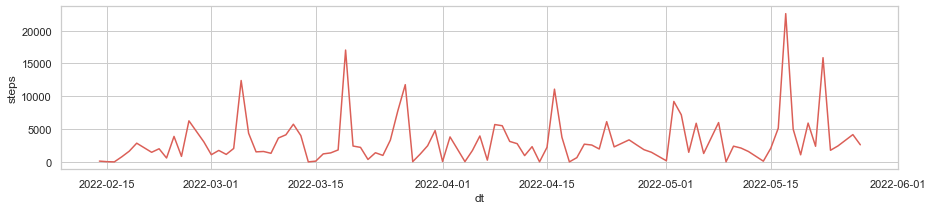

In [57]:
f, ax = plt.subplots(figsize=(15, 3))

ax = sns.lineplot(x="dt", y="steps", 
             data=df)

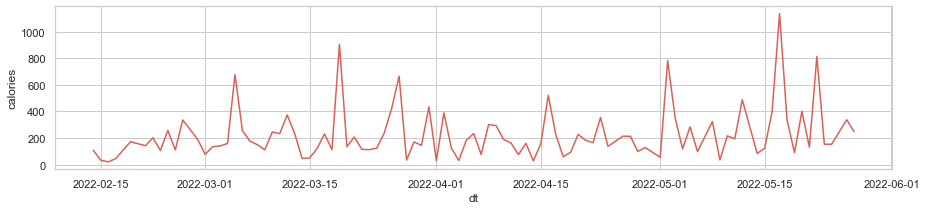

In [58]:
f, ax = plt.subplots(figsize=(15, 3))

ax = sns.lineplot(x="dt", y="calories", 
             data=df)

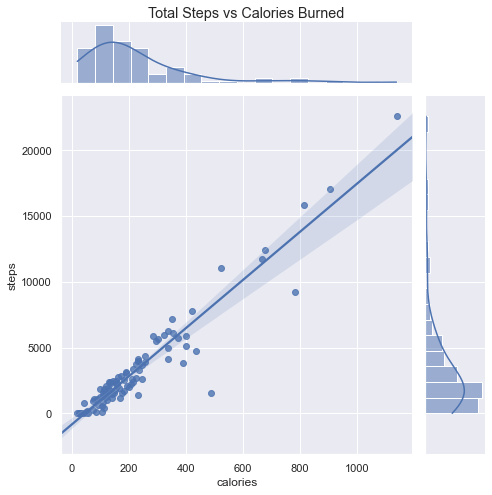

In [59]:
import seaborn as sns
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="calories", y="steps", data=df,
                  kind="reg", truncate=False,
                  height=7)

g.fig.suptitle("Total Steps vs Calories Burned")
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95) # Reduce plot to make room 

Text(0.5, 1.0, 'Heatmap of Steps')

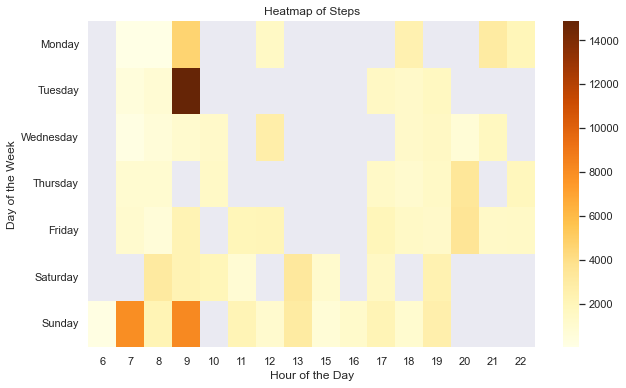

In [60]:
# day of week / hour trends
df_heatmap = df_all.groupby(['hour','day_name'])["steps"].median()
df_heatmap = df_heatmap.unstack(level=0)
df_heatmap

# heatmap by day of week and hour

f, ax = plt.subplots(figsize=(10, 6))
sns.color_palette("YlOrBr", as_cmap=True)

reorderlist = [ 'Monday', 'Tuesday','Wednesday' ,'Thursday' ,'Friday', 'Saturday', 'Sunday']
sns.heatmap(df_heatmap.reindex(reorderlist), cmap="YlOrBr")

plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

plt.title('Heatmap of Steps')

## Sleeps

In [61]:
df_merge = pd.DataFrame()
df_merge = df_sleep.merge(df_sleep_score, left_on='logId', right_on='sleep_log_entry_id')
df_merge

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,logType,mainSleep,levels.summary.deep.count,levels.summary.deep.minutes,levels.summary.deep.thirtyDayAvgMinutes,levels.summary.wake.count,levels.summary.wake.minutes,levels.summary.wake.thirtyDayAvgMinutes,levels.summary.light.count,levels.summary.light.minutes,levels.summary.light.thirtyDayAvgMinutes,levels.summary.rem.count,levels.summary.rem.minutes,levels.summary.rem.thirtyDayAvgMinutes,levels.data,levels.shortData,sleep_log_entry_id,timestamp,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,36087514296,2022-03-14,2022-03-13T23:42:30.000,2022-03-14T06:45:30.000,25380000,0,382,41,0,423,96,stages,0,auto_detected,True,5,48,54,32,41,66,30,278,274,10,56,53,"[{'dateTime': '2022-03-13T23:42:30.000', 'leve...","[{'dateTime': '2022-03-14T00:24:00.000', 'leve...",36087514296,2022-03-14T06:45:30Z,77,17,22,38,48,68,0.070838
1,36087514296,2022-03-14,2022-03-13T23:42:30.000,2022-03-14T06:45:30.000,25380000,0,382,41,0,423,96,stages,0,auto_detected,True,5,48,0,32,41,0,30,278,0,10,56,0,"[{'dateTime': '2022-03-13T23:42:30.000', 'leve...","[{'dateTime': '2022-03-14T00:24:00.000', 'leve...",36087514296,2022-03-14T06:45:30Z,77,17,22,38,48,68,0.070838
2,36036404233,2022-03-10,2022-03-09T23:26:00.000,2022-03-10T07:14:30.000,28080000,0,405,63,0,468,94,stages,0,auto_detected,True,4,56,54,27,63,66,27,243,276,7,106,51,"[{'dateTime': '2022-03-09T23:26:00.000', 'leve...","[{'dateTime': '2022-03-10T00:20:30.000', 'leve...",36036404233,2022-03-10T07:14:30Z,83,21,23,39,56,67,0.059284
3,36020390659,2022-03-09,2022-03-09T00:05:30.000,2022-03-09T07:22:30.000,26220000,0,327,110,0,437,94,stages,0,auto_detected,True,2,57,54,26,110,64,27,220,279,6,50,51,"[{'dateTime': '2022-03-09T00:05:30.000', 'leve...","[{'dateTime': '2022-03-09T00:44:00.000', 'leve...",36020390659,2022-03-09T07:22:30Z,46,16,20,10,57,70,0.153143
4,36020390658,2022-03-08,2022-03-07T23:44:00.000,2022-03-08T07:27:00.000,27780000,0,380,83,0,463,92,stages,0,auto_detected,True,4,49,54,27,83,63,27,280,279,4,51,51,"[{'dateTime': '2022-03-07T23:44:00.000', 'leve...","[{'dateTime': '2022-03-08T00:23:30.000', 'leve...",36020390658,2022-03-08T07:27:00Z,73,16,22,35,49,70,0.075171
5,35992416456,2022-03-07,2022-03-06T22:55:30.000,2022-03-07T06:42:00.000,27960000,0,397,69,0,466,97,stages,0,auto_detected,True,5,67,53,44,69,63,46,314,277,3,16,53,"[{'dateTime': '2022-03-06T22:55:30.000', 'leve...","[{'dateTime': '2022-03-06T23:12:30.000', 'leve...",35992416456,2022-03-07T06:42:00Z,73,15,22,36,67,68,0.081458
6,35952186635,2022-03-04,2022-03-03T23:32:00.000,2022-03-04T07:20:30.000,28080000,0,390,78,1,468,97,stages,0,auto_detected,True,2,46,53,44,78,62,43,318,274,3,26,54,"[{'dateTime': '2022-03-03T23:32:00.000', 'leve...","[{'dateTime': '2022-03-03T23:56:00.000', 'leve...",35952186635,2022-03-04T07:20:30Z,71,15,21,35,46,68,0.117396
7,35940067147,2022-03-03,2022-03-02T23:58:00.000,2022-03-03T04:26:30.000,16080000,0,226,42,0,268,98,stages,0,auto_detected,True,3,21,56,25,42,63,26,179,280,3,26,56,"[{'dateTime': '2022-03-02T23:58:00.000', 'leve...","[{'dateTime': '2022-03-03T00:19:30.000', 'leve...",35940067147,2022-03-03T04:26:30Z,64,14,22,28,21,69,0.081511
8,35927116069,2022-03-02,2022-03-01T23:36:00.000,2022-03-02T03:41:00.000,14700000,0,208,37,0,245,96,stages,0,auto_detected,True,1,26,57,20,37,65,20,163,288,1,19,58,"[{'dateTime': '2022-03-01T23:36:00.000', 'leve...","[{'dateTime': '2022-03-02T00:44:00.000', 'leve...",35927116069,2022-03-02T03:41:00Z,63,14,23,26,26,68,0.082816
9,35914801241,2022-03-01,2022-02-28T23:44:00.000,2022-03-01T07:20:00.000,27360000,0,388,68,0,456,99,stages,0,auto_detected,True,5,56,58,40,68,64,38,283,288,7,49,59,"[{'dateTime': '2022-02-28T23:44:00.000', 'leve...","[{'dateTime': '2022-02-28T23:58:00.000', 'leve...",35914801241,2022-03-01T07:20:00Z,77,16,23,38,55,70,0.077011

In [89]:
df_merge['pct_deep_sleep'] = df_merge['deep_sleep_in_minutes']/df_merge['minutesAsleep']

In [91]:
df_merge['hoursAsleep'] = df_merge['minutesAsleep']/60

In [62]:
df_merge['day_name'] = pd.to_datetime(df_merge['dateOfSleep']).dt.day_name()

Text(0.5, 1.0, 'Sleep Duration by Day')

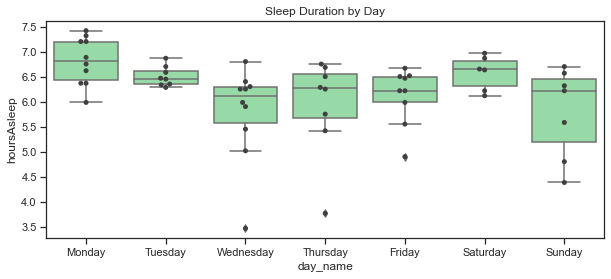

In [97]:
f, ax = plt.subplots(figsize=(10, 4))
sns.set_theme(style="ticks", palette="pastel")

reorderlist = [ 'Monday', 'Tuesday','Wednesday' ,'Thursday' ,'Friday', 'Saturday', 'Sunday']

ax = sns.boxplot(x="day_name", y="hoursAsleep", data=df_merge, order=reorderlist, palette=["g"])
ax = sns.swarmplot(x="day_name", y="hoursAsleep", data=df_merge, order=reorderlist, color=".25")

plt.title('Sleep Duration by Day')

Text(0.5, 1.0, 'Sleep Score by Day')

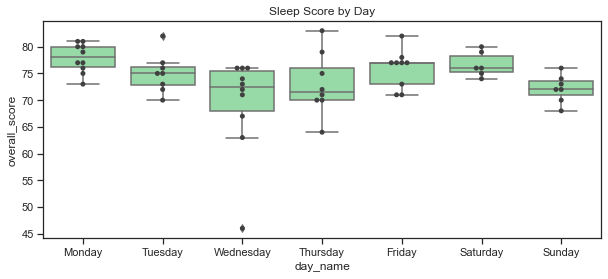

In [94]:
f, ax = plt.subplots(figsize=(10, 4))
sns.set_theme(style="ticks", palette="pastel")

reorderlist = [ 'Monday', 'Tuesday','Wednesday' ,'Thursday' ,'Friday', 'Saturday', 'Sunday']

ax = sns.boxplot(x="day_name", y="overall_score", data=df_merge, order=reorderlist, palette=["g"])
ax = sns.swarmplot(x="day_name", y="overall_score", data=df_merge, order=reorderlist, color=".25")

plt.title('Sleep Score by Day')

Text(0.5, 1.0, 'Deep Sleep by Day')

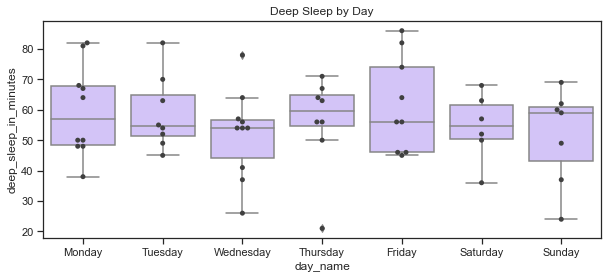

In [95]:
f, ax = plt.subplots(figsize=(10, 4))
sns.set_theme(style="ticks", palette="pastel")

reorderlist = [ 'Monday', 'Tuesday','Wednesday' ,'Thursday' ,'Friday', 'Saturday', 'Sunday']

ax = sns.boxplot(x="day_name", y="deep_sleep_in_minutes", data=df_merge, order=reorderlist, palette=["m"])
ax = sns.swarmplot(x="day_name", y="deep_sleep_in_minutes", data=df_merge, order=reorderlist, color=".25")

plt.title('Deep Sleep by Day')

Text(0.5, 1.0, 'Percentage Deep Sleep by Day')

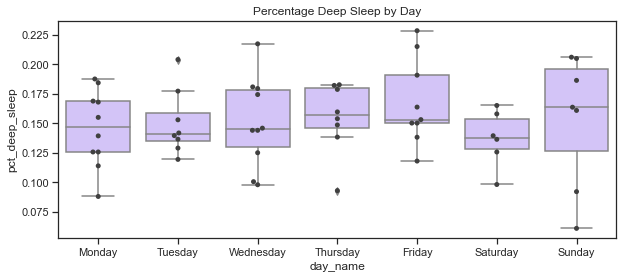

In [96]:
f, ax = plt.subplots(figsize=(10, 4))
sns.set_theme(style="ticks", palette="pastel")

reorderlist = [ 'Monday', 'Tuesday','Wednesday' ,'Thursday' ,'Friday', 'Saturday', 'Sunday']

ax = sns.boxplot(x="day_name", y="pct_deep_sleep", data=df_merge, order=reorderlist, palette=["m"])
ax = sns.swarmplot(x="day_name", y="pct_deep_sleep", data=df_merge, order=reorderlist, color=".25")

plt.title('Percentage Deep Sleep by Day')

Text(0.5, 1.0, 'Sleep Evaluation')

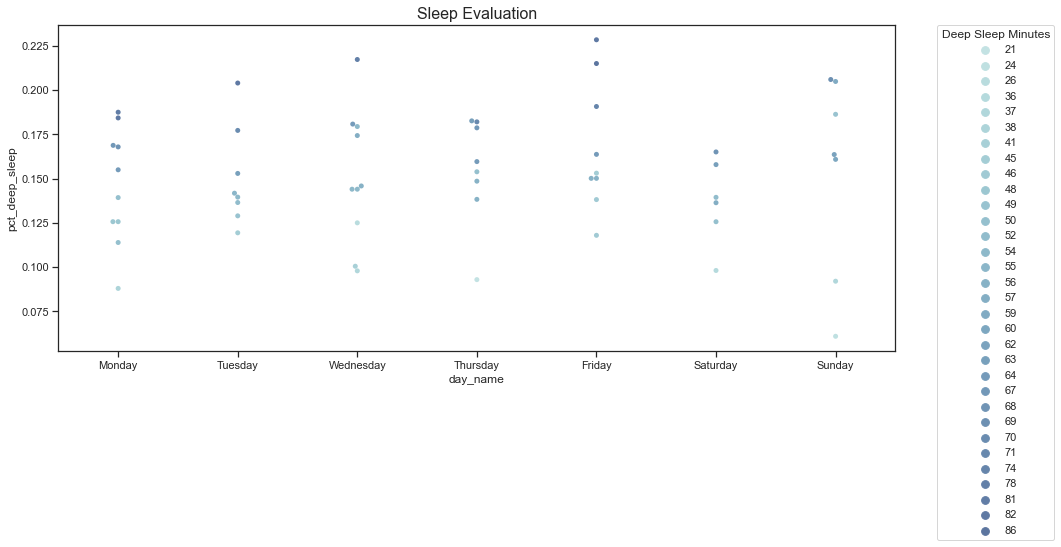

In [99]:
reorderlist = [ 'Monday', 'Tuesday','Wednesday' ,'Thursday' ,'Friday', 'Saturday', 'Sunday']
palette = sns.color_palette("ch:start=.2,rot=-.3",  n_colors=df_merge['pct_deep_sleep'].nunique() )

f, ax = plt.subplots(figsize=(15, 6))
ax = sns.swarmplot(data=df_merge, x="day_name", y="pct_deep_sleep", hue="deep_sleep_in_minutes", palette=palette, order=reorderlist)

plt.legend(title='Deep Sleep Minutes', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Sleep Evaluation', fontsize=16)

In [63]:
df_merge['dt'] = pd.to_datetime(df_merge['dateOfSleep'])

In [64]:
df['dt'] = pd.to_datetime(df['dt'])

df_calorie_sleep = pd.DataFrame()
df_calorie_sleep = df_merge[['dt','overall_score','composition_score','revitalization_score','duration_score','deep_sleep_in_minutes','resting_heart_rate','restlessness']].merge(df, left_on='dt', right_on='dt')
df_calorie_sleep

,dt,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,steps,calories
0,2022-03-14,77,17,22,38,48,68,0.070838,8.0,46
1,2022-03-14,77,17,22,38,48,68,0.070838,8.0,46
2,2022-03-10,83,21,23,39,56,67,0.059284,3647.0,245
3,2022-03-09,46,16,20,10,57,70,0.153143,1314.0,111
4,2022-03-08,73,16,22,35,49,70,0.075171,1590.0,150
5,2022-03-07,73,15,22,36,67,68,0.081458,1533.0,176
6,2022-03-04,71,15,21,35,46,68,0.117396,2050.0,159
7,2022-03-03,64,14,22,28,21,69,0.081511,1146.0,140
8,2022-03-02,63,14,23,26,26,68,0.082816,1750.0,134
9,2022-03-01,77,16,23,38,55,70,0.077011,1098.0,77


In [65]:
df_calorie_sleep['month'] = df_calorie_sleep['dt'].dt.strftime("%B")

df_calorie_sleep['month'] = pd.Categorical(df_calorie_sleep['month'], ["February", "March", "April", "May"])

In [66]:
df_calorie_sleep['deep_sleep_in_minutes'].nunique()

30

Text(0.5, 1.0, 'Sleep Evaluation')

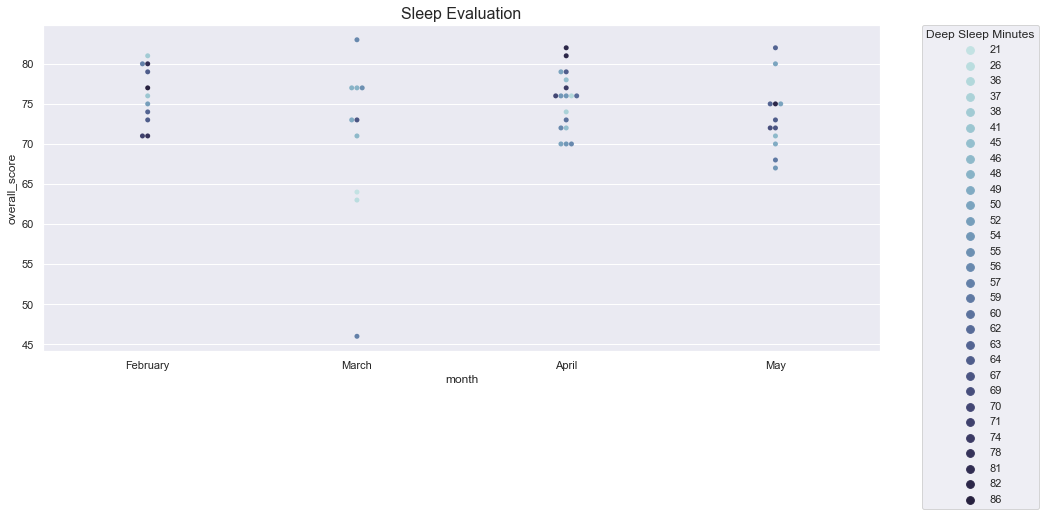

In [67]:
palette = sns.color_palette("ch:start=.2,rot=-.3",  n_colors=df_calorie_sleep['deep_sleep_in_minutes'].nunique() )

f, ax = plt.subplots(figsize=(15, 6))
ax = sns.swarmplot(data=df_calorie_sleep.sort_values("month"), x="month", y="overall_score", hue="deep_sleep_in_minutes", palette=palette)

plt.legend(title='Deep Sleep Minutes', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.ylabel('Calories per minute')
# plt.xlabel('Logging type')

plt.title('Sleep Evaluation', fontsize=16)

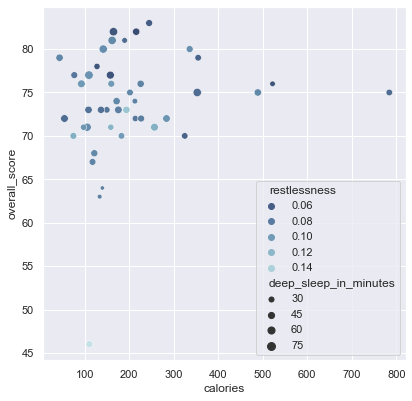

In [68]:
f, ax = plt.subplots(figsize=(6.5, 6.5))

sns.scatterplot(x="calories", y="overall_score",
                hue="restlessness", size="deep_sleep_in_minutes",
                palette="ch:r=-.2,d=.3_r",
#                 hue_order=clarity_ranking,
#                 sizes=(1, 8), linewidth=0,
                data=df_calorie_sleep[(df_calorie_sleep['steps']>100) & (df_calorie_sleep['steps']<20000)], ax=ax)
plt.show()

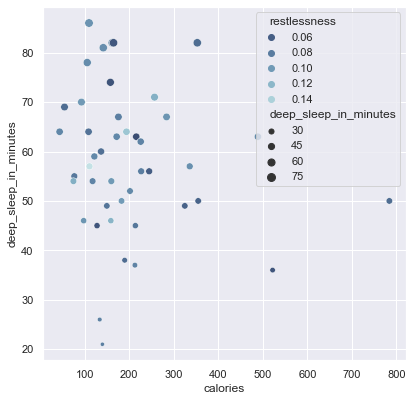

In [69]:
f, ax = plt.subplots(figsize=(6.5, 6.5))

sns.scatterplot(x="calories", y="deep_sleep_in_minutes",
                hue="restlessness", size="deep_sleep_in_minutes",
                palette="ch:r=-.2,d=.3_r",
#                 hue_order=clarity_ranking,
#                 sizes=(1, 8), linewidth=0,
                data=df_calorie_sleep[(df_calorie_sleep['steps']>100) & (df_calorie_sleep['steps']<20000)], ax=ax)
plt.show()

In [70]:
df_calorie_sleep[(df_calorie_sleep['steps']>100) & (df_calorie_sleep['steps']<20000)][['overall_score','composition_score','revitalization_score','duration_score','deep_sleep_in_minutes','resting_heart_rate','restlessness','steps','calories']].corr()

,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,steps,calories
overall_score,1.000000,0.502582,0.419377,0.955126,0.309299,-0.050243,-0.567049,0.182841,0.174944
composition_score,0.502582,1.000000,0.028108,0.269561,0.316499,-0.098835,-0.151413,0.078821,0.023847
revitalization_score,0.419377,0.028108,1.000000,0.303031,-0.161341,0.271451,-0.730925,0.197513,0.182787
duration_score,0.955126,0.269561,0.303031,1.000000,0.298169,-0.079734,-0.491218,0.155835,0.167220
deep_sleep_in_minutes,0.309299,0.316499,-0.161341,0.298169,1.000000,-0.086917,0.072370,-0.157011,-0.136592
resting_heart_rate,-0.050243,-0.098835,0.271451,-0.079734,-0.086917,1.000000,0.077530,0.079322,0.045915
restlessness,-0.567049,-0.151413,-0.730925,-0.491218,0.072370,0.077530,1.000000,-0.299672,-0.259629
steps,0.182841,0.078821,0.197513,0.155835,-0.157011,0.079322,-0.299672,1.000000,0.840423
calories,0.174944,0.023847,0.182787,0.167220,-0.136592,0.045915,-0.259629,0.840423,1.000000


Text(0.5, 1.0, 'Exercise (Calories/Steps) vs Sleep Score')

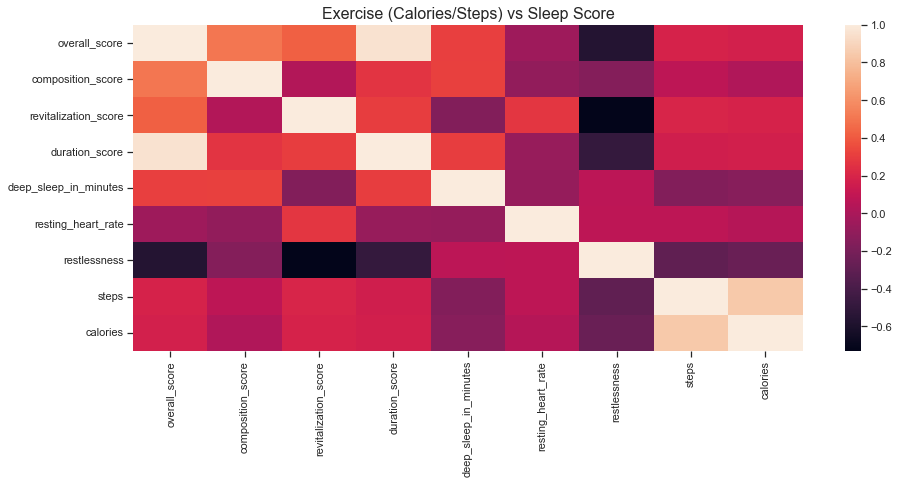

In [100]:
f, ax = plt.subplots(figsize=(15, 6))

ax = sns.heatmap(df_calorie_sleep[(df_calorie_sleep['steps']>100) & (df_calorie_sleep['steps']<20000)][['overall_score','composition_score','revitalization_score','duration_score','deep_sleep_in_minutes','resting_heart_rate','restlessness','steps','calories']].corr())
plt.title('Exercise (Calories/Steps) vs Sleep Score', fontsize=16)